# Function defs

Esta tabla contiene la información de las definiciones de funciones.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'functiondef__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('functiondefs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-22 14:25:16.408309 Data cache files found ...
2024-05-22 14:25:16.442438 Data cache files successfully loaded!!
The dataset contains 59873 (40.56%) instances for BEGINNER class and 87754 (59.44%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'functiondefs'
TABLE_FEATURES = ['functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (87754, 12)
As we can see the downloaded data contains a total of 87754 instances. For each instance we have 12 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 87754 entries, 31141 to 147626
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   functiondef__name_convention             87754 non-null  object 
 1   functiondef__number_of_characters        87754 non-null  int64  
 2   functiondef__is_magic                    87754 non-null  bool   
 3   functiondef__is_private                  87754 non-null  bool   
 4   functiondef__body_count                  87754 non-null  int64  
 5   functiondef__expressions_pct             87754 non-null  float64
 6   functiondef__is_async                    87754 non-null  bool   
 7   functiondef__number_of_decorators        87754 non-null  int64  
 8   functiondef__has_return_type_annotation  87754 non-null  bool   
 9   functiondef__has_doc_string              87754 non-null  bool   
 10  functiondef__height                      87754

Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 5 variables boleanas y dos de tipo objeto. 

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [64.64%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
dtype: int64

In [6]:
print_empty_cols(X)

functiondef__name_convention
----------------------------
0 instancias no tienen un valor para la columna functiondef__name_convention


functiondef__number_of_characters
---------------------------------
0 instancias no tienen un valor para la columna functiondef__number_of_characters


functiondef__is_magic
---------------------
0 instancias no tienen un valor para la columna functiondef__is_magic


functiondef__is_private
-----------------------
0 instancias no tienen un valor para la columna functiondef__is_private


functiondef__body_count
-----------------------
0 instancias no tienen un valor para la columna functiondef__body_count


functiondef__expressions_pct
----------------------------
0 instancias no tienen un valor para la columna functiondef__expressions_pct


functiondef__is_async
---------------------
0 instancias no tienen un valor para la columna functiondef__is_async


functiondef__number_of_decorators
---------------------------------
0 instancias no tienen un valo

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
functiondef__name_convention,87754,7,SnakeCase,68206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,87754.0,NaN,NaN,NaN,14.865339,9.322948,1.0,8.0,13.0,20.0,87.0
functiondef__is_magic,87754,2,False,77351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__is_private,87754,2,False,75776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__body_count,87754.0,NaN,NaN,NaN,4.33619,5.243832,1.0,1.0,3.0,5.0,364.0
functiondef__expressions_pct,87754.0,NaN,NaN,NaN,0.2233,0.282876,0.0,0.0,0.111111,0.384615,1.0
functiondef__is_async,87754,2,False,84219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_decorators,87754.0,NaN,NaN,NaN,0.256763,0.582553,0.0,0.0,0.0,0.0,46.0
functiondef__has_return_type_annotation,87754,2,False,57593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__has_doc_string,87754,2,False,60113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 46
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 12), (12, 18), (18, inf)], # min: 1 ; max: 87
    "functiondef__body_count": [(1.0, 1.0), (1.0, 3.0), (3.0, 5.0), (5.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(1.0, 1.0), (1.0, 1.9), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 10
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(X_copy, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
functiondef__expressions_pct  count  percentage
                   [0.0_0.0]  41066   46.796727
                   [0.0_0.5)  26610   30.323404
                   [0.5_1.0)  15043   17.142239
                   [1.0_inf]   5035    5.737630

functiondef__number_of_decorators  count  percentage
                        [0.0_0.0]  68076   77.575951
                        [0.0_inf]  19678   22.424049

functiondef__type_annotations_pct  count  percentage
                        [0.0_0.0]  50892   57.993938
                        [0.0_1.0)  27882   31.772911
                        [1.0_inf]   8980   10.233152

functiondef__number_of_characters  count  percentage
                         [18_inf]  27485   31.320510
                         [8.0_12)  23710   27.018711
                          [12_18)  20463   23.318595
                        [1.0_8.0)  16096   18.342184

functiondef__body_count  count  percentage
              [5.0_inf]  27187   30.980924
           

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (87754, 18)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

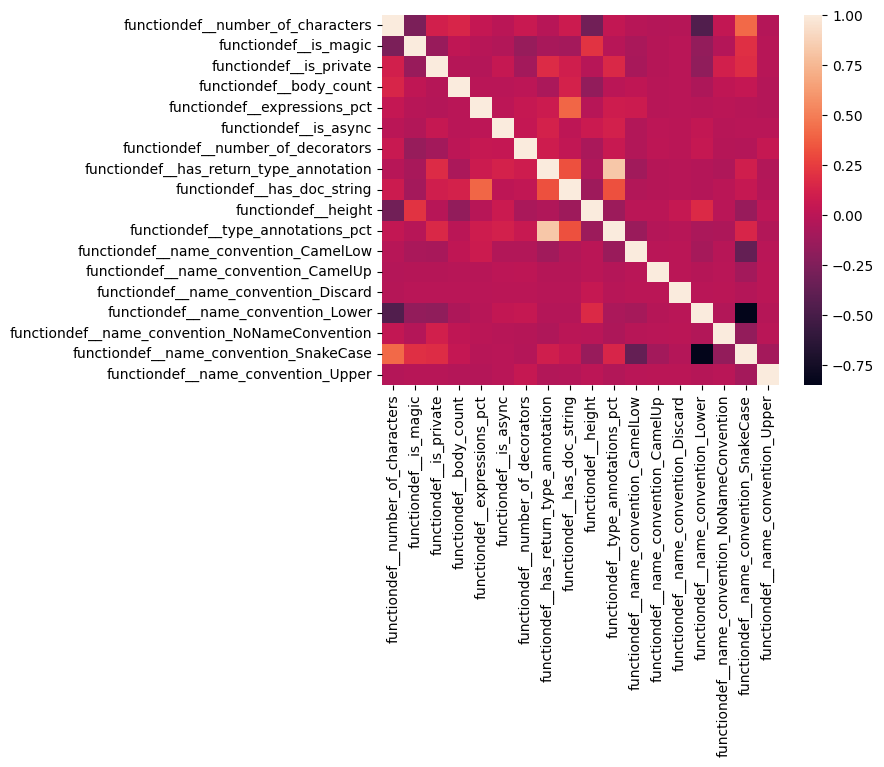

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 12 variables (2 porcentuales, 4 numericas, 5 booleanas y 1 categorica)

### Variable is_private (1/12)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

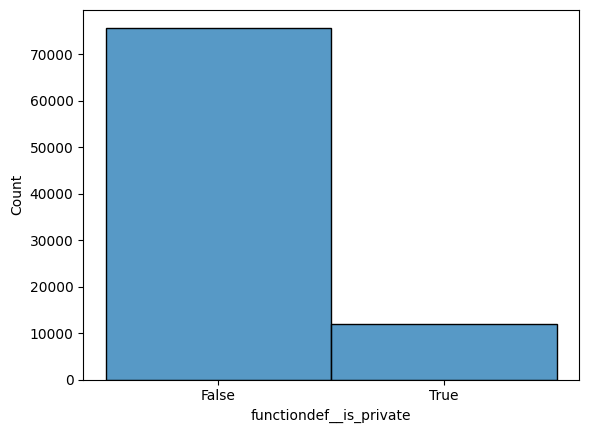

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [12]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 11978 valores verdaderos y 75776 valores falsos. Y, la desviación típica es de 0.34331560134887695
La frecuencia con la que programa puede tener la variable is_private a True es 0.13649520249789182.
La frecuencia con la que programa puede tener la variable is_private a False es 0.8635047975021082.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 86.35% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 13.65% de los items.


In [14]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,11978.000000,11978.0,11978.0,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.000000,11978.0,11978.0,11978.0,11978.0,11978.000000,11978.000000,11978.000000
mean,17.333529,0.0,1.0,4.000334,0.200591,0.063951,0.112623,0.553348,0.428786,1.775255,0.450688,0.0,0.0,0.0,0.0,0.031307,0.968275,0.000417
std,7.313496,0.0,0.0,4.205560,0.246967,0.244675,0.334370,0.497167,0.494923,0.544810,0.384446,0.0,0.0,0.0,0.0,0.174154,0.175274,0.020428
min,2.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,12.000000,0.0,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
50%,17.000000,0.0,1.0,3.000000,0.125000,0.000000,0.000000,1.000000,0.000000,2.000000,0.500000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
75%,21.000000,0.0,1.0,5.000000,0.333333,0.000000,0.000000,1.000000,1.000000,2.000000,0.750000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000
max,54.000000,0.0,1.0,172.000000,1.000000,1.000000,3.000000,1.000000,1.000000,7.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


### Variable is_magic (2/12)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

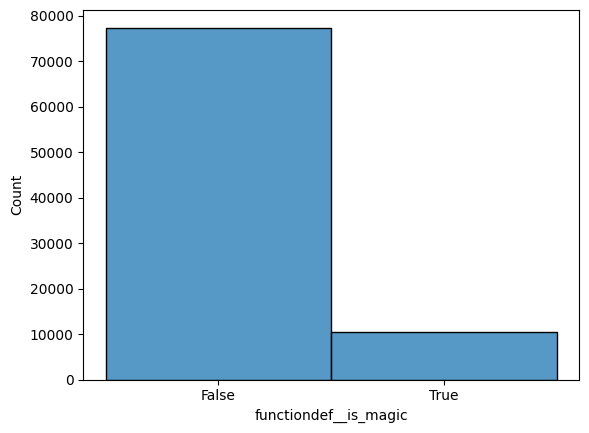

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 10403 valores verdaderos y 77351 valores falsos. Y, la desviación típica es de 0.3232569098472595
La frecuencia con la que programa puede tener la variable is_magic a True es 0.118547302687057.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.881452697312943.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 88.15% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 11.85% de los items.


In [18]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,10403.000000,10403.0,10403.0,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.0,10403.0,10403.0,10403.0,10403.0,10403.0,10403.0
mean,8.133231,1.0,0.0,4.646352,0.210819,0.020379,0.015861,0.241469,0.198885,2.145343,0.281342,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,1.079842,0.0,0.0,6.049180,0.279023,0.141299,0.129477,0.427994,0.399180,0.428534,0.350757,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,6.000000,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,8.000000,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,8.000000,1.0,0.0,3.000000,0.100000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,8.000000,1.0,0.0,6.000000,0.333333,0.000000,0.000000,0.000000,0.000000,2.000000,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,28.000000,1.0,0.0,172.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Variable is_async (3/12)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

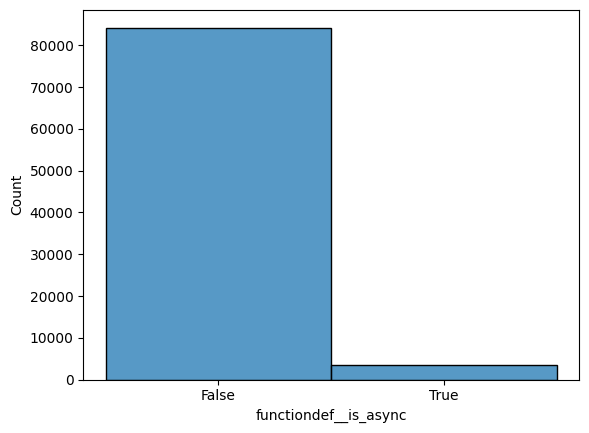

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 3535 valores verdaderos y 84219 valores falsos. Y, la desviación típica es de 0.19662344455718994
La frecuencia con la que programa puede tener la variable is_async a True es 0.040283064019873735.
La frecuencia con la que programa puede tener la variable is_async a False es 0.9597169359801263.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 95.97% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 4.028% de los items.


In [22]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.0,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.000000,3535.0,3535.000000,3535.000000,3535.000000,3535.0
mean,14.709194,0.059972,0.216690,4.115983,0.231429,1.0,0.388402,0.623197,0.340877,2.007072,0.512400,0.000849,0.005375,0.0,0.235926,0.000283,0.757567,0.0
std,9.297586,0.237468,0.412048,4.403221,0.287784,0.0,0.677416,0.484654,0.474071,0.609495,0.364849,0.029123,0.073126,0.0,0.424637,0.016819,0.428615,0.0
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,8.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
50%,13.000000,0.000000,0.000000,3.000000,0.125000,1.0,0.000000,1.000000,0.000000,2.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
75%,20.000000,0.000000,0.000000,5.000000,0.400000,1.0,1.000000,1.000000,1.000000,2.000000,0.800000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,69.000000,1.000000,1.000000,59.000000,1.000000,1.0,5.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Variable has_return_type_annotation (4/12)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

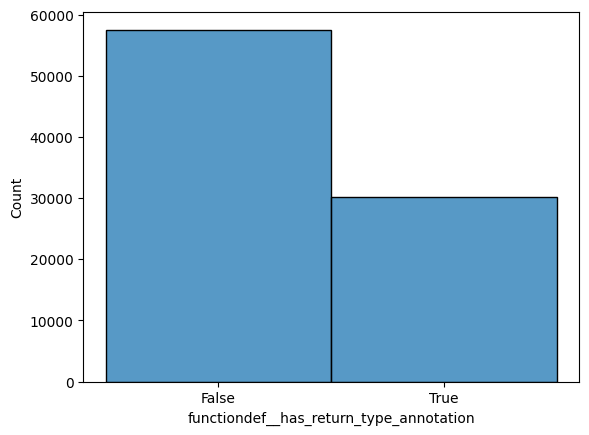

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 30161 valores verdaderos y 57593 valores falsos. Y, la desviación típica es de 0.47494491934776306
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.34369943250450125.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.6563005674954988.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 65.63% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 34.37% de los items.


In [26]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.0,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.0,30161.000000,30161.000000,30161.000000,30161.0
mean,14.684460,0.083286,0.219754,3.838334,0.253032,0.073041,0.328471,1.0,0.524518,1.763701,0.726377,0.008355,0.001558,0.0,0.155234,0.001326,0.833527,0.0
std,8.033992,0.276319,0.414087,3.756858,0.275471,0.260209,0.544469,0.0,0.499407,0.496102,0.208099,0.091025,0.039445,0.0,0.362133,0.036394,0.372511,0.0
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.071429,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,8.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
50%,13.000000,0.000000,0.000000,3.000000,0.200000,0.000000,0.000000,1.0,1.000000,2.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
75%,19.000000,0.000000,0.000000,5.000000,0.500000,0.000000,1.000000,1.0,1.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0
max,87.000000,1.000000,1.000000,83.000000,1.000000,1.000000,20.000000,1.0,1.000000,6.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


### Variable has_doc_string (5/12)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

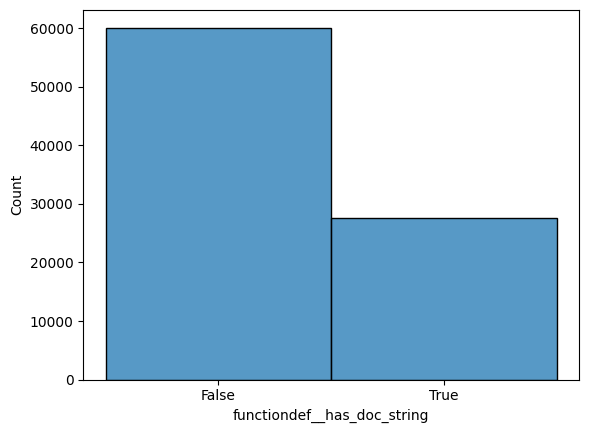

In [27]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [28]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 27641 valores verdaderos y 60113 valores falsos. Y, la desviación típica es de 0.4645116925239563
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.3149827928071655.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.6850172071928345.


In [29]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 68.5% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 31.5% de los items.


In [30]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,27641.000000,27641.000000,27641.000000,27641.000000,27641.000000,27641.000000,27641.000000,27641.000000,27641.0,27641.000000,27641.00000,27641.000000,27641.000000,27641.0,27641.000000,27641.000000,27641.000000,27641.000000
mean,15.919938,0.074853,0.185811,5.293947,0.391707,0.043595,0.278970,0.572338,1.0,1.691798,0.47942,0.028002,0.001375,0.0,0.153866,0.007127,0.809052,0.000579
std,9.288420,0.263158,0.388961,5.189508,0.219798,0.204195,0.669305,0.494748,0.0,0.490703,0.38587,0.164981,0.037053,0.0,0.360826,0.084122,0.393055,0.024053
min,1.000000,0.000000,0.000000,1.000000,0.011628,0.000000,0.000000,0.000000,1.0,1.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,2.000000,0.222222,0.000000,0.000000,0.000000,1.0,1.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,14.000000,0.000000,0.000000,4.000000,0.333333,0.000000,0.000000,1.000000,1.0,2.000000,0.50000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,21.000000,0.000000,0.000000,6.000000,0.500000,0.000000,0.000000,1.000000,1.0,2.000000,0.80000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,70.000000,1.000000,1.000000,192.000000,1.000000,1.000000,46.000000,1.000000,1.0,5.000000,1.00000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (6/12)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 87. Con una media de 14.8.

<Axes: ylabel='functiondef__number_of_characters'>

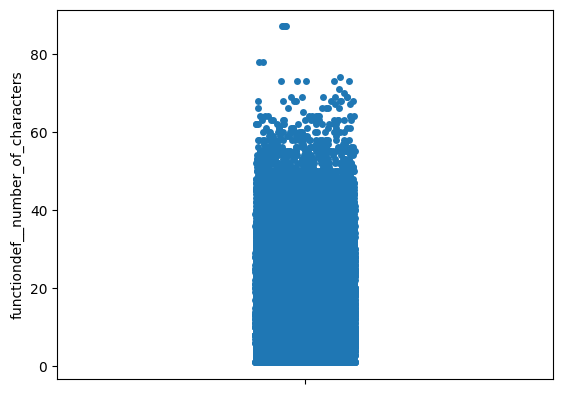

In [31]:
sns.stripplot(X['functiondef__number_of_characters'])

In [32]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7163816005288565
Rango valores atípicos extremos (Tukey): [-28.0,56.0]
Rango valores atípicos leves (Tukey): [-10.0,38.0]
Rango valores atípicos extremos (Fixed BoxPlot): [6.533268939695825,336.04928291284557]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -28.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -10.0 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 2281 instancias tienen un valor para functiondef__number_of_characters superior a 38.0 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 2.599% del total de instancias.
+3.0IQR: 159 instancias tienen un valor para functiondef__number_of_characters superior a 56.0 (Q3-3*IQR) para functiondef__number_of_characters. 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 56.0 (Con un MC de 71 usamos Tuckey Extremo)

In [33]:
X[X['functiondef__number_of_characters'] > 56].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,159.000000,159.0,159.0,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.0,159.0,159.0,159.000000,159.000000,159.0
mean,62.622643,0.0,0.0,6.849057,0.243370,0.037736,0.421384,0.176101,0.220126,1.503145,0.213312,0.006289,0.0,0.0,0.0,0.062893,0.930818,0.0
std,5.999662,0.0,0.0,5.574795,0.285520,0.191159,0.790639,0.382109,0.415640,0.501570,0.397954,0.079305,0.0,0.0,0.0,0.243538,0.254566,0.0
min,57.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
25%,58.000000,0.0,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
50%,61.000000,0.0,0.0,5.000000,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
75%,64.000000,0.0,0.0,9.000000,0.400000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0
max,87.000000,0.0,0.0,40.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0


### IMPORTANTE
Hay que revisar los 4 con nombres de 80 caracteres

### Variable body_count (7/12)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 364. Con una media de 4.3.

<Axes: ylabel='functiondef__body_count'>

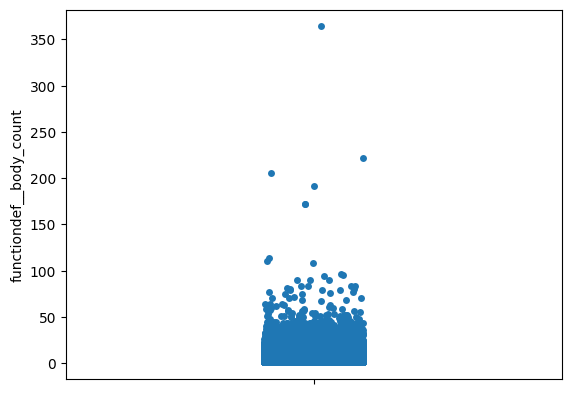

In [34]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [35]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6242165526320702
Rango valores atípicos extremos (Tukey): [-11.0,17.0]
Rango valores atípicos leves (Tukey): [-5.0,11.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.32497021623327216,77.86625808124114]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -11.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -5.0 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 5556 instancias tienen un valor para functiondef__body_count superior a 11.0 (Q3+1.5*IQR) para functiondef__body_count. Representando un 6.331% del total de instancias.
+3.0IQR: 2053 instancias tienen un valor para functiondef__body_count superior a 17.0 (Q3-3*IQR) para functiondef__body_count. Representando un 2.339% del total de instancias.
L: 0 instancias tienen un valor

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 77.0 (Con un MC de 77 usamos U)

In [36]:
X[X['functiondef__body_count'] > 77].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,25.000000,25.000000,25.00,25.000000,25.000000,25.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.00,25.0,25.0,25.000000,25.00,25.000000,25.0
mean,11.320000,0.360000,0.04,121.120003,0.308197,0.0,0.120000,0.080000,0.200000,1.680000,0.080000,0.04,0.0,0.0,0.120000,0.04,0.800000,0.0
std,6.446705,0.489898,0.20,67.028801,0.335753,0.0,0.331662,0.276887,0.408248,0.476095,0.276887,0.20,0.0,0.0,0.331662,0.20,0.408248,0.0
min,3.000000,0.000000,0.00,79.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0
25%,8.000000,0.000000,0.00,83.000000,0.050000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00,0.0,0.0,0.000000,0.00,1.000000,0.0
50%,8.000000,0.000000,0.00,90.000000,0.154762,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.00,0.0,0.0,0.000000,0.00,1.000000,0.0
75%,14.000000,1.000000,0.00,114.000000,0.518072,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.00,0.0,0.0,0.000000,0.00,1.000000,0.0
max,27.000000,1.000000,1.00,364.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,1.00,0.0,0.0,1.000000,1.00,1.000000,0.0


### IMPORTANTE
Hay que revisar los 6 que tienen longitud mayor de 160

### Variable number_of_decorators (8/12)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 46. Con una media de 0.25.

<Axes: ylabel='functiondef__number_of_decorators'>

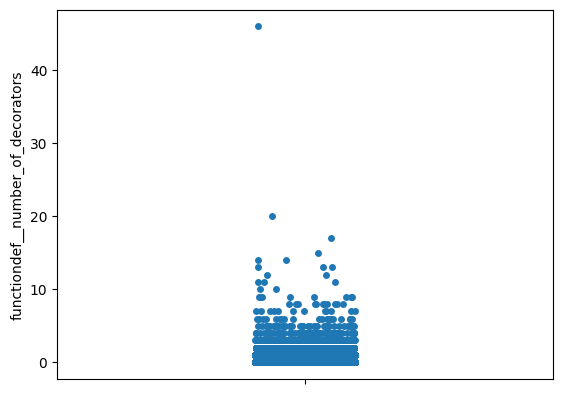

In [37]:
sns.stripplot(X['functiondef__number_of_decorators'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [38]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7768317021971355
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 19678 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 22.42% del total de instancias.
+3.0IQR: 19678 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 22.42% del total de i

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [39]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000
mean,15.602246,0.008080,0.065149,3.901362,0.249336,0.054731,1.145035,0.463055,0.336010,1.744435,0.341453,0.024596,0.004472,0.000203,0.216740,0.004167,0.740268,0.009554
std,10.082986,0.089528,0.246795,4.799372,0.305785,0.227461,0.704499,0.498646,0.472354,0.568335,0.368615,0.154894,0.066725,0.014256,0.412034,0.064420,0.438498,0.097278
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000,2.000000,0.133333,0.000000,1.000000,0.000000,0.000000,2.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21.000000,0.000000,0.000000,5.000000,0.500000,0.000000,1.000000,1.000000,1.000000,2.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,74.000000,1.000000,1.000000,84.000000,1.000000,1.000000,46.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 77% de las funciones no tienen decoradores.

### Variable height (9/12)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 10. Con una media de 1.8.

<Axes: ylabel='functiondef__height'>

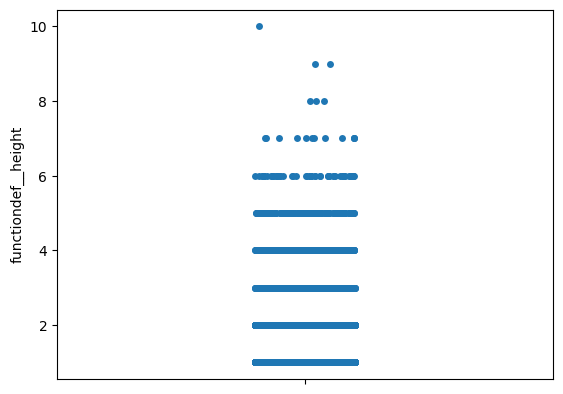

In [40]:
sns.stripplot(X['functiondef__height'])

In [41]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.362473976218414
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.5781872604854188,8.394006153231587]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a -2.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a -0.5 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 1206 instancias tienen un valor para functiondef__height superior a 3.5 (Q3+1.5*IQR) para functiondef__height. Representando un 1.374% del total de instancias.
+3.0IQR: 70 instancias tienen un valor para functiondef__height superior a 5.0 (Q3-3*IQR) para functiondef__height. Representando un 0.07977% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 0.5

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 5.0 (Con un MC de 30 usamos Tuckey Extremo)

In [42]:
X[X['functiondef__height'] > 5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.0,70.000000,70.000000,70.0,70.000000,70.0
mean,10.085714,0.0,0.200000,2.257143,0.189762,0.057143,0.100000,0.114286,0.0,6.400000,0.167347,0.042857,0.0,0.071429,0.300000,0.0,0.585714,0.0
std,7.751097,0.0,0.402888,1.750244,0.332599,0.233791,0.302166,0.320455,0.0,0.823566,0.372026,0.203997,0.0,0.259399,0.461566,0.0,0.496155,0.0
min,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
25%,6.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
50%,8.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.0
75%,12.500000,0.0,0.000000,3.000000,0.333333,0.000000,0.000000,0.000000,0.0,6.750000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.000000,0.0
max,33.000000,0.0,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,0.0,10.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0


### IMPORTANTE
Hay 3 funciones con altura mayor que 8, hay que revisarlas.

### Variable expressions_pct (10/12)
Esta variable representa la proporción de las sentencias en el root de la funcion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.22.

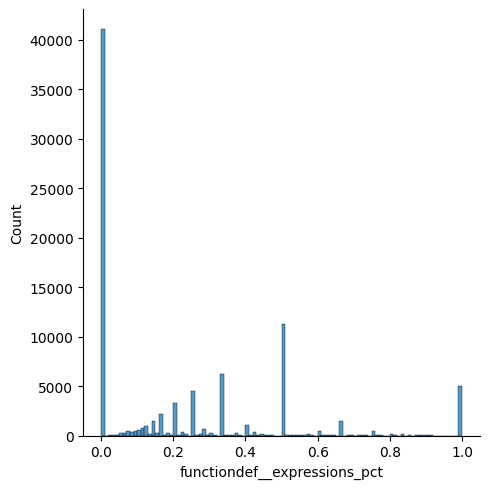

In [43]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [44]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.4938240200281143
Rango valores atípicos extremos (Tukey): [-1.1538461744785309,1.5384615659713745]
Rango valores atípicos leves (Tukey): [-0.5769230872392654,0.9615384787321091]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.102444879181222,4.543511834987222]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.1538461744785309 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.5769230872392654 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 5037 instancias tienen un valor para functiondef__expressions_pct superior a 0.9615384787321091 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 5.74% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superio

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.96 (Con un MC de 0.49 usamos Tuckey)

In [45]:
X[X['functiondef__expressions_pct'] > 0.96].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000
mean,13.011513,0.131401,0.082374,1.632195,0.999980,0.047241,0.368400,0.355498,0.283843,1.952561,0.306303,0.093489,0.002779,0.000397,0.207027,0.005558,0.690552,0.000198
std,8.514750,0.337872,0.274961,2.014118,0.000843,0.212175,0.672535,0.478712,0.450906,0.602038,0.367912,0.291146,0.052647,0.019922,0.405215,0.074350,0.462312,0.014089
min,1.000000,0.000000,0.000000,1.000000,0.961538,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,16.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,68.000000,1.000000,1.000000,79.000000,1.000000,1.000000,12.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 46% tienen un 0% y el 5% un 100% de expresiones.

### Variable type_annotations_pct (11/12)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.29.

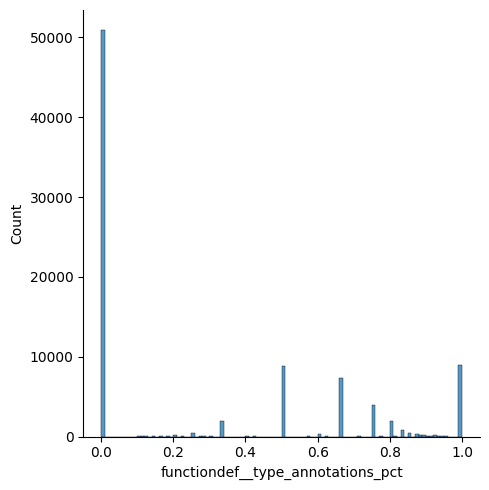

In [46]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [47]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.32564184069633484
Rango valores atípicos extremos (Tukey): [-2.0000000596046448,2.6666667461395264]
Rango valores atípicos leves (Tukey): [-1.0000000298023224,1.666666716337204]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.31990013416346963,4.3453959826695]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -2.0000000596046448 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -1.0000000298023224 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct superior a 1.666666716337204 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.0 (Todos los umbrales son 0)

In [48]:
X[X['functiondef__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper
count,36862.000000,36862.000000,36862.000000,36862.000000,36862.000000,36862.000000,36862.000000,36862.000000,36862.000000,36862.000000,36862.000000,36862.000000,36862.000000,36862.0,36862.000000,36862.000000,36862.000000,36862.000000
mean,14.673051,0.119446,0.200505,4.079676,0.252589,0.066735,0.310455,0.818214,0.489963,1.761462,0.708078,0.006972,0.001465,0.0,0.149422,0.001221,0.840893,0.000027
std,8.281347,0.324316,0.400383,4.097192,0.278930,0.249567,0.612068,0.385673,0.499906,0.511805,0.217818,0.083208,0.038247,0.0,0.356509,0.034919,0.365781,0.005208
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.033333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,13.000000,0.000000,0.000000,3.000000,0.200000,0.000000,0.000000,1.000000,0.000000,2.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,19.000000,0.000000,0.000000,5.000000,0.500000,0.000000,1.000000,1.000000,1.000000,2.000000,0.928571,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,87.000000,1.000000,1.000000,83.000000,1.000000,1.000000,20.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 58% tienen un 0% y el 10% un 100% de anotaciones de tipo.

### Variable name_convention (12/22)
Esta variable es de tipo categórica y representa la name_convention del nombre de la funcion.

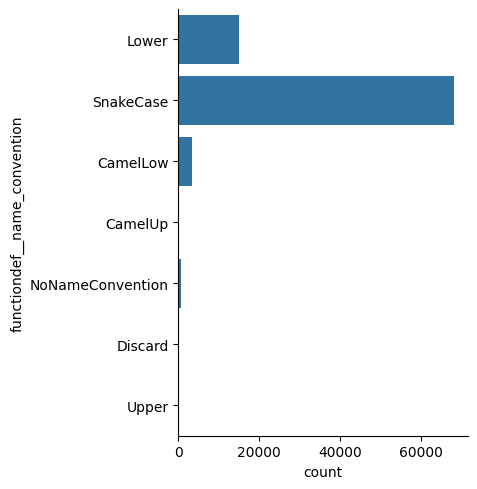

In [49]:
sns.catplot(full_table['functiondef__name_convention'], kind="count")

In [50]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable functiondef__name_convention toma el valor de SnakeCase en un 77.72% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 17.14% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 3.782% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 0.7669% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 0.3008% de los items.
La variable functiondef__name_convention toma el valor de Upper en un 0.2575% de los items.
La variable functiondef__name_convention toma el valor de Discard en un 0.02963% de los items.


## Multivariate

TODO: isolation forest algorithm

In [51]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__expertise_level
60741,CamelLow,9,False,False,56,0.017857,False,2,False,True,2,0.0,EXPERT
65303,CamelLow,7,False,False,56,0.035714,False,1,False,True,2,0.0,EXPERT
65340,NoNameConvention,17,True,False,17,0.117647,False,0,False,True,1,0.0,EXPERT
65905,NoNameConvention,19,True,False,13,0.230769,False,0,False,True,1,0.0,EXPERT
65907,NoNameConvention,17,True,False,15,0.066667,False,0,False,True,1,0.0,EXPERT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144054,NoNameConvention,21,True,False,63,0.158730,False,0,False,True,2,0.0,EXPERT
144058,NoNameConvention,21,True,False,27,0.037037,False,0,False,False,2,0.0,EXPERT
144059,NoNameConvention,22,True,False,43,0.441860,False,0,False,False,2,0.0,EXPERT
144062,NoNameConvention,27,True,False,52,0.057692,False,0,False,False,2,0.0,EXPERT


### IMPORTANTE
Hay que analizar los 106 los outliers de la tabla.